### 2440094680 - Belinda Gan

In [1]:
!pip install jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -monokai

In [4]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [5]:
# set_nb_theme('monokai')

In [6]:
print("\n")

Question: Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

In [7]:
import numpy as np
import pandas as pd
import re, string, collections
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import pprint
from tqdm import tqdm
%matplotlib inline

In [8]:
# sms = pd.read_csv('spam.csv', sep= ';')
# sms

In [9]:
sms = pd.read_csv('spam.csv', sep = ",", error_bad_lines = False, encoding = 'latin')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
updated_sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [12]:
updated_sms.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
updated_sms.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
words = updated_sms.iloc[:,0]
words

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [15]:
# categorize data in v1 column -- spam (Category 0) and ham (Category 1)
updated_sms["v1"] = updated_sms["v1"].replace(to_replace = "spam", value = 0)
updated_sms["v1"] = updated_sms["v1"].replace(to_replace = "ham", value = 1)

In [16]:
updated_sms.head(10)

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...


In [17]:
updated_sms.describe()

,v1
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [18]:
print("\n")

#### Text Analysis with:

# Word Cloud

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
print("\n")

##### TEXT ANALYSIS

<AxesSubplot:xlabel='v1'>

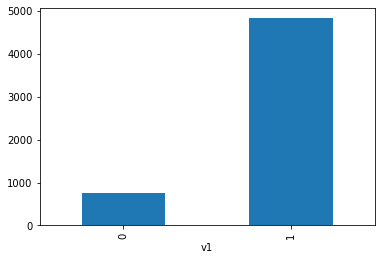

In [22]:
# Visualization
updated_sms.groupby("v1").size().plot(kind = "bar")

In [23]:
# from the graph above, we can see that HAM Category has the biggest value

### ham

In [24]:
ham = updated_sms[updated_sms["v1"] == 1]
ham.head(10)

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
10,1,I'm gonna be home soon and i don't want to tal...
13,1,I've been searching for the right words to tha...
14,1,I HAVE A DATE ON SUNDAY WITH WILL!!
16,1,Oh k...i'm watching here:)


In [25]:
ham.value_counts()

v1  v2                                                                                            
1   Sorry, I'll call later                                                                            30
    I cant pick the phone right now. Pls send a message                                               12
    Ok...                                                                                             10
    Okie                                                                                               4
    Ok.                                                                                                4
                                                                                                      ..
    Pls call me da. What happen.                                                                       1
    Pls ask macho how much is budget for bb bold 2 is cos i saw a new one for  &lt;#&gt;  dollars.     1
    Pls accept me for one day. Or am begging you change the n

In [26]:
words_of_ham = ' '.join(ham["v2"])

In [27]:
words_of_ham

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

In [28]:
ham.describe()

,v1
count,4825.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


##### Performance

In [29]:
stopwords = set(STOPWORDS)

In [30]:
ham_wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_font_size = 50, max_words = 2000).generate(words_of_ham)
ham_wordcloud

##### Plotting

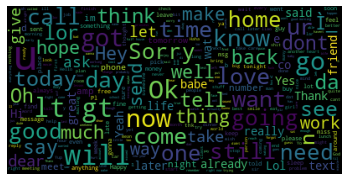

In [31]:
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

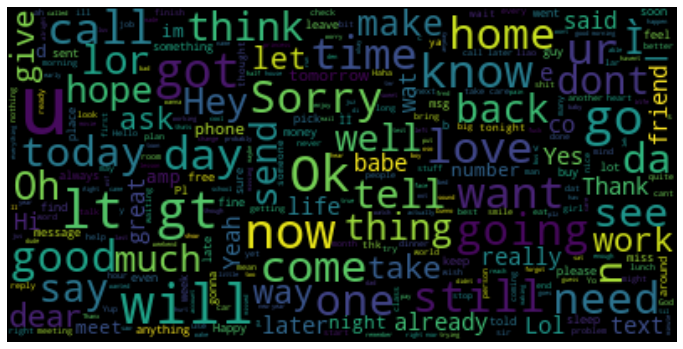

In [32]:
plt.figure(figsize = (12, 8))
plt.imshow(ham_wordcloud, interpolation = "bilinear") # to display image appear more smoothly
plt.axis('off')
plt.show()

In [33]:
# dapat disimpulkan bahwa dari ham_wordcloud, kata yang paling banyak muncul adalah u di Category 1 (HAM)

In [34]:
print("\n")

### spam

In [35]:
spam = updated_sms[updated_sms["v1"] == 0]
spam.head(10)

,v1,v2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
5,0,FreeMsg Hey there darling it's been 3 week's n...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...
11,0,"SIX chances to win CASH! From 100 to 20,000 po..."
12,0,URGENT! You have won a 1 week FREE membership ...
15,0,"XXXMobileMovieClub: To use your credit, click ..."
19,0,England v Macedonia - dont miss the goals/team...
34,0,Thanks for your subscription to Ringtone UK yo...
42,0,07732584351 - Rodger Burns - MSG = We tried to...


In [36]:
spam.value_counts()

v1  v2                                                                                                                                                                  
0   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!                   4
    Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'    3
    Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                              3
    I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.          3
    HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Play Now! Send HMV to 86688 More info

In [37]:
words_of_spam = " ".join(spam["v2"])
words_of_spam

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [38]:
spam_wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_font_size = 50, max_words = 1000).generate(words_of_spam)
spam_wordcloud

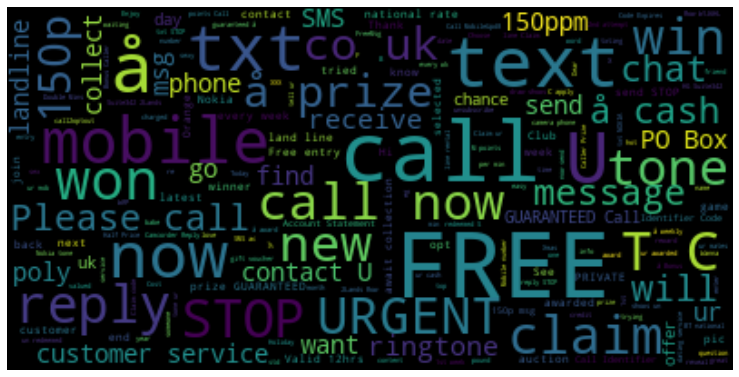

In [39]:
plt.figure(figsize = (13, 9))
plt.imshow(spam_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [40]:
# dari spam_wordcloud, dapat disimpulkan bahwa kata yang paling banyak muncul dari Category 0 (Spam) adalah Free

In [41]:
print("\n")

In [42]:
print("\n\n")

# N Grams

In [43]:
!pip install -U dill

Requirement already up-to-date: dill in c:\users\belinda gan\anaconda3\lib\site-packages (0.3.3)


In [44]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Belinda
[nltk_data]     Gan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\Belinda
[nltk_data]     Gan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Belinda
[nltk_data]     Gan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
import nltk
from collections import Counter
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import trigrams
from nltk.corpus import stopwords
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

In [48]:
print("\n")

### ham

In [49]:
ham.head(10)

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
10,1,I'm gonna be home soon and i don't want to tal...
13,1,I've been searching for the right words to tha...
14,1,I HAVE A DATE ON SUNDAY WITH WILL!!
16,1,Oh k...i'm watching here:)


In [87]:
"""
# create corpus (a large and structured set of texts) <-- we need corpus as we have over 5000 data

word_net_lemmatizer = WordNetLemmatizer()
ham_corpus = []
for index in range(0, len(updated_sms[updated_sms["v1"] == 1])):
    reviews = re.sub("[^a-zA-Z]", " ", updated_sms["v2"][index])
    reviews = reviews.lower()
    reviews = reviews.split()
    reviews = [word_net_lemmatizer.lemmatize(words) for words in reviews if not words in set(stopwords.words('english'))]
    reviews = " ".join(reviews)
    ham_corpus.append(reviews)
"""

'\n# create corpus (a large and structured set of texts) <-- we need corpus as we have over 5000 data\n\n# 1. Ham\nword_net_lemmatizer = WordNetLemmatizer()\nham_corpus = []\nfor index in range(0, len(updated_sms[updated_sms["v1"] == 1])):\n    reviews = re.sub("[^a-zA-Z]", " ", updated_sms["v2"][index])\n    reviews = reviews.lower()\n    reviews = reviews.split()\n    reviews = [word_net_lemmatizer.lemmatize(words) for words in reviews if not words in set(stopwords.words(\'english\'))]\n    reviews = " ".join(reviews)\n    ham_corpus.append(reviews)\n'

In [52]:
# len(ham_corpus)

In [53]:
ham_tokens = word_tokenize(words_of_ham)
ham_tokens

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...',
 'Ok',
 'lar',
 '...',
 'Joking',
 'wif',
 'u',
 'oni',
 '...',
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'U',
 'c',
 'already',
 'then',
 'say',
 '...',
 'Nah',
 'I',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'Even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 '.',
 'They',
 'treat',
 'me',
 'like',
 'aids',
 'patent',
 '.',
 'As',
 'per',
 'your',
 'request',
 "'Melle",
 'Melle',
 '(',
 'Oru',
 'Minnaminunginte',
 'Nurungu',
 'Vettam',
 ')',
 "'",
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertune',
 'for',
 'all',
 'Callers',
 '.',
 'Press',
 '*',
 '9',
 'to',
 'copy',
 'your',
 'friends',
 'Callertune',
 'I',
 "'m",
 'gon',
 'na',
 'be',
 'home',
 'soon',
 

In [54]:
# punctuation_remove = "[" + re.sub("\'", "", string.punctuation) + re.sub("\,", "", string.punctuation) + "]"
# tokens = re.sub(punctuation_remove, "", str(tokens))

In [55]:
# text = nltk.Text(tokens)
# text

In [56]:
ham_ngram = ngrams(ham_tokens, 2) 

In [57]:
ham_ngram_frequency = collections.Counter(ham_ngram)
ham_ngram_frequency.most_common(10)

[(('.', 'I'), 496),
 (('&', 'lt'), 314),
 (('lt', ';'), 314),
 (('&', 'gt'), 314),
 (('gt', ';'), 314),
 (('I', "'m"), 281),
 (('#', '&'), 280),
 ((';', '#'), 276),
 ((':', ')'), 251),
 (('?', 'I'), 178)]

In [143]:
# Ham Bigrams
list(nltk.bigrams(ham_tokens))

[('Go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point'),
 ('point', ','),
 (',', 'crazy'),
 ('crazy', '..'),
 ('..', 'Available'),
 ('Available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', '...'),
 ('...', 'Cine'),
 ('Cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', '...'),
 ('...', 'Ok'),
 ('Ok', 'lar'),
 ('lar', '...'),
 ('...', 'Joking'),
 ('Joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', '...'),
 ('...', 'U'),
 ('U', 'dun'),
 ('dun', 'say'),
 ('say', 'so'),
 ('so', 'early'),
 ('early', 'hor'),
 ('hor', '...'),
 ('...', 'U'),
 ('U', 'c'),
 ('c', 'already'),
 ('already', 'then'),
 ('then', 'say'),
 ('say', '...'),
 ('...', 'Nah'),
 ('Nah', 'I'),
 ('I', 'do'),
 ('do', "n't"),
 ("n't", 'think'),
 ('think', 'he'),
 ('he', 'goes'),
 ('goes', 'to'),
 ('to', 'usf'),
 ('usf', ','),
 (',', 'he'),
 ('he', 'lives'),
 ('lives', 'aro

In [165]:
ham_bigrams = nltk.bigrams(ham_tokens)
new_ham_bigrams = [(column1, column2) for column1, column2 in ham_bigrams if len(column1) >= 5 & len(column2) >= 5]

In [168]:
ham_bigrams_frequency = nltk.FreqDist(new_ham_bigrams)
ham_bigrams_frequency.most_common(10)

[(('phone', 'right'), 12),
 (('about', 'smiling'), 8),
 (('empty', 'without'), 8),
 (('later', 'tonight'), 7),
 (('persons', 'story'), 6),
 (('think', 'about'), 6),
 (('Happy', "B'day"), 5),
 (('After', 'lunch'), 5),
 (('forwarded', 'message'), 5),
 (('great', 'weekend'), 4)]

In [ ]:
# from the ham bigram frequency result above, I can conclude that a set of two consecutive words (phone and right) has the biggest frequency (12)

In [151]:
list(nltk.trigrams(ham_tokens))

[('Go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', ','),
 ('point', ',', 'crazy'),
 (',', 'crazy', '..'),
 ('crazy', '..', 'Available'),
 ('..', 'Available', 'only'),
 ('Available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', '...'),
 ('buffet', '...', 'Cine'),
 ('...', 'Cine', 'there'),
 ('Cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', '...'),
 ('wat', '...', 'Ok'),
 ('...', 'Ok', 'lar'),
 ('Ok', 'lar', '...'),
 ('lar', '...', 'Joking'),
 ('...', 'Joking', 'wif'),
 ('Joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', '...'),
 ('oni', '...', 'U'),
 ('...', 'U', 'dun'),
 ('U', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', '...'),
 ('hor', '...', 'U'),
 ('...', 'U', 'c'),
 ('U', 'c', '

In [58]:
# from ham n gram frequency above, we can see that words 'lt' and 'gt' have the biggest frequency (both are 628)

In [179]:
print("\n")

### spam

In [59]:
# word_net_lemmatizer = WordNetLemmatizer()
# spam_corpus = []
# for index in range(0, len(updated_sms[updated_sms["v1"] == 0])):
    # reviews2 = re.sub("[^a-zA-Z]", " ", updated_sms["v2"][index])
    # reviews2 = reviews2.lower()
    # reviews2 = reviews2.split()
    # reviews2 = [word_net_lemmatizer.lemmatize(words) for words in reviews2 if not words in set(stopwords.words('english'))]
    # reviews2 = " ".join(reviews2)
    # spam_corpus.append(reviews2)

In [60]:
# len(spam_corpus)

In [61]:
spam_tokens = word_tokenize(words_of_spam)
spam_tokens

['Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 '.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv',
 'WINNER',
 '!',
 '!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 'been',
 'selected',
 'to',
 'receivea',
 'å£900',
 'prize',
 'reward',
 '!',
 'To',
 'claim',
 'call',
 '09061701461',
 '.',
 'Claim',
 'code',
 'KL341',
 '.',
 'Valid',
 '12',
 'hours',
 'only',
 '.',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more',
 '?',
 'U',
 'R',
 '

In [62]:
spam_ngram = ngrams(spam_tokens, 2)

In [63]:
spam_ngram_frequency = collections.Counter(spam_ngram)
spam_ngram_frequency.most_common(10)

[(('.', 'Call'), 80),
 (('*', '*'), 61),
 (('now', '!'), 56),
 (('T', '&'), 50),
 (('.', 'To'), 46),
 (('!', 'Your'), 41),
 (('You', 'have'), 39),
 (('to', 'contact'), 37),
 (('have', 'won'), 36),
 (('URGENT', '!'), 34)]

In [144]:
# Spam Bigrams
list(nltk.bigrams(spam_tokens))

[('this', 'is'),
 ('is', 'the'),
 ('the', 'time'),
 ('time', 'we'),
 ('we', 'have'),
 ('have', 'tried'),
 ('tried', 'contact'),
 ('contact', 'u'),
 ('u', 'u'),
 ('u', 'have'),
 ('have', 'won'),
 ('won', 'the'),
 ('the', 'pound'),
 ('pound', 'prize'),
 ('prize', 'claim'),
 ('claim', 'is'),
 ('is', 'easy'),
 ('easy', 'call'),
 ('call', 'only'),
 ('only', 'per'),
 ('per', 'minute'),
 ('minute', 'bt'),
 ('bt', 'national'),
 ('national', 'rate')]

In [175]:
spam_bigrams = nltk.bigrams(spam_tokens)
new_spam_bigrams = [(column1, column2) for column1, column2 in spam_bigrams if len(column1) >= 5 & len(column2) >= 5]

In [178]:
spam_bigrams_frequency = nltk.FreqDist(new_spam_bigrams)
spam_bigrams_frequency.most_common(5)

[(('tried', 'contact'), 1), (('pound', 'prize'), 1), (('prize', 'claim'), 1)]

In [ ]:
# from the spam bigrams frequency above, I can conclude that three sets of two consecutive words [(tried, contact), (pound, prize), (prize, claim)] has the biggest frequency (1).

In [150]:
list(nltk.trigrams(spam_tokens))

[('this', 'is', 'the'),
 ('is', 'the', 'time'),
 ('the', 'time', 'we'),
 ('time', 'we', 'have'),
 ('we', 'have', 'tried'),
 ('have', 'tried', 'contact'),
 ('tried', 'contact', 'u'),
 ('contact', 'u', 'u'),
 ('u', 'u', 'have'),
 ('u', 'have', 'won'),
 ('have', 'won', 'the'),
 ('won', 'the', 'pound'),
 ('the', 'pound', 'prize'),
 ('pound', 'prize', 'claim'),
 ('prize', 'claim', 'is'),
 ('claim', 'is', 'easy'),
 ('is', 'easy', 'call'),
 ('easy', 'call', 'only'),
 ('call', 'only', 'per'),
 ('only', 'per', 'minute'),
 ('per', 'minute', 'bt'),
 ('minute', 'bt', 'national'),
 ('bt', 'national', 'rate')]

In [64]:
# from spam n gram frequency above, word 'Call' has the greatest frequency (80)

In [65]:
print("\n\n")

# Topic Modeling

In [66]:
!pip install textblob

In [67]:
!pip install stop_words

In [68]:
from stop_words import get_stop_words
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import show, figure, output_file
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [69]:
!pip install gensim

In [70]:
!pip install pyLDAvis

In [129]:
import gensim
from gensim import corpora, models
import pyLDAvis.gensim
from collections import OrderedDict

In [72]:
print("\n")

# Text Preprocessing

In [187]:
print("\n")

## Text Data Tokenization and Lemmatization

In [ ]:
# Explanations about what is corpus and why we need to create corpus in NLP from https://www.definedcrowd.com/blog/the-challenge-of-building-corpus-for-nlp-libraries/ and http://www.paddingtonschool.es/wp-content/uploads/2013/12/ETp70_CorpusDelecti1.pdf:
# However, most machines aren’t equipped to understand language and its surrounding content or intention. 
# As a result, natural language annotation is important for creating structured training data that enables machines to understand human speech for tasks such as question answering or summarization.
# We need to create corpus since we need to build a dictionary with corpora, which is more than one corpus, to be able to process the data statistically.
# A corpus allows us to observe important variations in the frequency of many words

# 1. In NLP, a corpus contains text and speech data that can be used to train AI and machine learning systems.

### 1. Ham

In [73]:
# create corpus (a large and structured set of texts) <-- we need corpus as we have over 5000 data

word_net_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r"\b[a-zA-Z]+\b")
ham_corpus = []
for index in ham["v2"].iteritems():
    reviews = str(index[1]).lower()
    tokens = tokenizer.tokenize(reviews)
    
    # remove stop words from the word tokens
    removed_stop_words = [reviews for reviews in tokens if not reviews in get_stop_words("english")]
    updated_tokens = [reviews for reviews in removed_stop_words if not reviews in set(stopwords.words("english"))]
    
    # lemmatize tokens
    lemmatized_tokens = [word_net_lemmatizer.lemmatize(tokens) for tokens in updated_tokens]
    
    # remove word that doesn't contain any single character
    updated_lemmatized_tokens = [reviews for reviews in lemmatized_tokens if not len(reviews) == 1]
    
    # add the lemmatized tokens to ham_corpus
    ham_corpus.append(updated_lemmatized_tokens)

In [183]:
print("\n")

### 2. Spam

In [74]:
spam_corpus = []
for index in spam["v2"].iteritems():
    spam_reviews = str(index[1]).lower()
    spam_tokens = RegexpTokenizer(r"\b[a-zA-Z]+\b").tokenize(spam_reviews)
    
    removed_stop_words2 = [spam_reviews for spam_reviews in spam_tokens if not spam_reviews in get_stop_words("english")]
    updated_spam_tokens = [spam_reviews for spam_reviews in removed_stop_words2 if not spam_reviews in set(stopwords.words("english"))]
    
    lemmatized_spam_tokens = [WordNetLemmatizer().lemmatize(spam_tokens) for spam_tokens in updated_spam_tokens]
    
    updated_lemmatized_spam_tokens = [spam_reviews for spam_reviews in lemmatized_spam_tokens if not len(spam_reviews) == 1]
    
    spam_corpus.append(updated_lemmatized_spam_tokens)

In [184]:
print("\n")

#### Create dictionary and document term matrix

In [186]:
# Explanations about why we should create dictionary from https://stackabuse.com/python-for-nlp-working-with-the-gensim-library-part-1/:


# 1. Statistical algorithms work with numbers, however, natural languages contain data in the form of text. Therefore, a mechanism is needed to convert words to numbers. Similarly, after applying different types of processes on the numbers, we need to convert numbers back to text.

# 2. One way to achieve this type of functionality is to create a dictionary that assigns a numeric ID to every unique word in the document. The dictionary can then be used to find the numeric equivalent of a word and vice versa.

In [75]:
# 1. Ham
# to create a dictionary of ham_tokens
ham_word_dictionary = corpora.Dictionary(ham_corpus) # note: more than one corpus is called corpora
corpus = [ham_word_dictionary.doc2bow(words) for words in ham_corpus]

In [76]:
# 2. Spam
# to create a dictionary of spam_tokens
spam_word_dictionary = corpora.Dictionary(spam_corpus)
corpus2 = [spam_word_dictionary.doc2bow(words) for words in spam_corpus]

In [81]:
print("\n")

### LDA Model

In [77]:
# 1. Ham
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = ham_word_dictionary, passes = 10)
pprint.pprint(lda.top_topics(corpus, topn = 10))

[([(0.019164743, 'get'),
   (0.018071461, 'day'),
   (0.016485587, 'love'),
   (0.0112248, 'one'),
   (0.011057896, 'leave'),
   (0.0098536955, 'ok'),
   (0.009850005, 'call'),
   (0.009685142, 'many'),
   (0.00930674, 'happy'),
   (0.0089649875, 'time')],
  -3.4549695006301206),
 ([(0.026596827, 'know'),
   (0.024060916, 'dont'),
   (0.015914952, 'much'),
   (0.011964879, 'one'),
   (0.011625374, 'ur'),
   (0.011191503, 'let'),
   (0.010786877, 'please'),
   (0.010340452, 'something'),
   (0.009768446, 'pls'),
   (0.00957081, 'tell')],
  -3.703766142875712),
 ([(0.03484751, 'call'),
   (0.032023475, 'later'),
   (0.024956472, 'sorry'),
   (0.015112948, 'home'),
   (0.014210673, 'tonight'),
   (0.014185285, 'going'),
   (0.013514719, 'go'),
   (0.013190196, 'still'),
   (0.010466578, 'babe'),
   (0.010048989, 'meeting')],
  -3.859564560147286),
 ([(0.025809126, 'lor'),
   (0.0231934, 'ok'),
   (0.018548744, 'go'),
   (0.01788456, 'come'),
   (0.016466763, 'wat'),
   (0.015590583, 'got'

In [78]:
# 2. Spam
spam_lda = gensim.models.ldamodel.LdaModel(corpus2, num_topics = 10, id2word = spam_word_dictionary, passes = 10)
pprint.pprint(lda.top_topics(corpus2, topn = 10))

[([(0.025809126, 'lor'),
   (0.0231934, 'ok'),
   (0.018548744, 'go'),
   (0.01788456, 'come'),
   (0.016466763, 'wat'),
   (0.015590583, 'got'),
   (0.012112295, 'phone'),
   (0.010365218, 'ask'),
   (0.009681439, 'ur'),
   (0.009110245, 'oh')],
  -15.304622458294698),
 ([(0.03484751, 'call'),
   (0.032023475, 'later'),
   (0.024956472, 'sorry'),
   (0.015112948, 'home'),
   (0.014210673, 'tonight'),
   (0.014185285, 'going'),
   (0.013514719, 'go'),
   (0.013190196, 'still'),
   (0.010466578, 'babe'),
   (0.010048989, 'meeting')],
  -17.55273850326684),
 ([(0.023593385, 'ur'),
   (0.020034933, 'take'),
   (0.013482458, 'next'),
   (0.010711787, 'like'),
   (0.009805201, 'want'),
   (0.00974316, 'go'),
   (0.0093272785, 'care'),
   (0.008530655, 'mean'),
   (0.008457085, 'good'),
   (0.0073536434, 'sm')],
  -18.232171619969165),
 ([(0.029209737, 'da'),
   (0.016557474, 'need'),
   (0.01187301, 'face'),
   (0.010036182, 'got'),
   (0.009643047, 'take'),
   (0.00861216, 'thing'),
   (0.

In [79]:
print("\n")

In [92]:
# 1. Ham Topic Showcase
lda.show_topics(10, 5)

[(0,
  '0.022*"good" + 0.018*"get" + 0.012*"sure" + 0.012*"call" + 0.010*"want"'),
 (1, '0.024*"ur" + 0.020*"take" + 0.013*"next" + 0.011*"like" + 0.010*"want"'),
 (2, '0.027*"know" + 0.024*"dont" + 0.016*"much" + 0.012*"one" + 0.012*"ur"'),
 (3, '0.019*"get" + 0.018*"day" + 0.016*"love" + 0.011*"one" + 0.011*"leave"'),
 (4, '0.065*"gt" + 0.064*"lt" + 0.016*"number" + 0.010*"day" + 0.010*"like"'),
 (5, '0.029*"hi" + 0.016*"know" + 0.014*"make" + 0.012*"see" + 0.011*"night"'),
 (6, '0.026*"lor" + 0.023*"ok" + 0.019*"go" + 0.018*"come" + 0.016*"wat"'),
 (7,
  '0.035*"call" + 0.032*"later" + 0.025*"sorry" + 0.015*"home" + 0.014*"tonight"'),
 (8, '0.029*"da" + 0.017*"need" + 0.012*"face" + 0.010*"got" + 0.010*"take"'),
 (9,
  '0.023*"lol" + 0.018*"new" + 0.017*"year" + 0.016*"thanks" + 0.015*"smile"')]

In [93]:
# 2. Spam Topic Showcase
spam_lda.show_topics(10, 5)

[(0, '0.034*"ur" + 0.031*"txt" + 0.019*"draw" + 0.017*"www" + 0.015*"cash"'),
 (1,
  '0.026*"call" + 0.025*"stop" + 0.023*"ur" + 0.019*"msg" + 0.014*"reveal"'),
 (2,
  '0.051*"free" + 0.048*"call" + 0.033*"mobile" + 0.026*"reply" + 0.025*"text"'),
 (3, '0.031*"stop" + 0.023*"www" + 0.020*"box" + 0.020*"cash" + 0.018*"po"'),
 (4, '0.036*"ur" + 0.024*"week" + 0.023*"tone" + 0.021*"free" + 0.019*"call"'),
 (5,
  '0.026*"txt" + 0.022*"call" + 0.017*"tone" + 0.014*"mobile" + 0.014*"stop"'),
 (6,
  '0.068*"call" + 0.047*"prize" + 0.030*"claim" + 0.029*"mobile" + 0.029*"urgent"'),
 (7, '0.052*"call" + 0.035*"min" + 0.030*"free" + 0.022*"txt" + 0.018*"rate"'),
 (8,
  '0.031*"free" + 0.031*"text" + 0.021*"txt" + 0.019*"nokia" + 0.018*"take"'),
 (9,
  '0.027*"call" + 0.019*"stop" + 0.015*"reply" + 0.015*"day" + 0.014*"please"')]

In [97]:
# 1. Ham
ham_lda_data = {index: OrderedDict(lda.show_topic(index, 20)) for index in range(10)}

In [98]:
ham_lda_dataframe = pd.DataFrame(ham_lda_data)
ham_lda_dataframe

,0,1,2,3,4,5,6,7,8,9
good,0.022229,0.008457,NaN,NaN,0.004412,NaN,NaN,0.008828,0.006685,NaN
get,0.017514,0.007281,NaN,0.019165,NaN,NaN,NaN,NaN,0.007265,0.012374
sure,0.012492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call,0.011557,NaN,NaN,0.009850,NaN,NaN,NaN,0.034848,NaN,NaN
want,0.009929,0.009805,0.006498,NaN,NaN,0.010821,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
aight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007676
yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007302
gud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007277
enjoy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007212


In [101]:
# Since there are lots of missing values, we need to fill in the missing values with 0
ham_lda_dataframe.fillna(0)

,0,1,2,3,4,5,6,7,8,9
good,0.022229,0.008457,0.000000,0.000000,0.004412,0.000000,0.0,0.008828,0.006685,0.000000
get,0.017514,0.007281,0.000000,0.019165,0.000000,0.000000,0.0,0.000000,0.007265,0.012374
sure,0.012492,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
call,0.011557,0.000000,0.000000,0.009850,0.000000,0.000000,0.0,0.034848,0.000000,0.000000
want,0.009929,0.009805,0.006498,0.000000,0.000000,0.010821,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
aight,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007676
yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007302
gud,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007277
enjoy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007212


In [102]:
ham_lda_dataframe.fillna(0).T # similar to matrix transformation, adding .T behind is used to transform row to column and otherwise

,good,get,sure,call,want,princess,missing,sir,ready,morning,...,new,year,thanks,smile,text,aight,yes,gud,enjoy,happen
0,0.022229,0.017514,0.012492,0.011557,0.009929,0.009649,0.008742,0.008531,0.008428,0.008373,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.008457,0.007281,0.000000,0.000000,0.009805,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.006498,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.019165,0.000000,0.009850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.010821,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.008828,0.000000,0.000000,0.034848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.006685,0.007265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.012374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017912,0.017233,0.015527,0.01471,0.012711,0.007676,0.007302,0.007277,0.007212,0.007148


In [104]:
# 2. Spam
spam_lda_data = {index: OrderedDict(spam_lda.show_topic(index, 20)) for index in range(10)}
spam_lda_dataframe = pd.DataFrame(spam_lda_data)
spam_lda_dataframe

,0,1,2,3,4,5,6,7,8,9
ur,0.033679,0.022520,NaN,NaN,0.036499,NaN,NaN,NaN,0.016118,NaN
txt,0.031223,0.011902,NaN,NaN,0.016220,0.025949,NaN,0.022268,0.020658,0.009877
draw,0.019481,NaN,NaN,NaN,NaN,NaN,0.012986,NaN,NaN,NaN
www,0.016591,NaN,NaN,0.022798,NaN,NaN,NaN,0.012019,0.010060,0.009632
cash,0.014764,NaN,NaN,0.019525,NaN,NaN,0.012490,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009432,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014728
delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013330
important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011725


In [105]:
spam_lda_dataframe.fillna(0).T

,ur,txt,draw,www,cash,voucher,gift,music,win,msg,...,orange,word,take,auction,part,summer,day,delivery,important,end
0,0.033679,0.031223,0.019481,0.016591,0.014764,0.014688,0.014623,0.013073,0.012250,0.011732,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.022520,0.011902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.022798,0.019525,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.036499,0.016220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.025949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.012986,0.000000,0.012490,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.022268,0.000000,0.012019,0.000000,0.000000,0.000000,0.000000,0.009186,0.000000,...,0.010516,0.009233,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.016118,0.020658,0.000000,0.010060,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,...,0.000000,0.000000,0.017968,0.016693,0.009599,0.009432,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.009877,0.000000,0.009632,0.000000,0.000000,0.000000,0.000000,0.000000,0.009634,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014728,0.01333,0.011725,0.008683


In [107]:
print("\n")

## Bag of Words

### 1. Spam

In [125]:
spam_count_vectorizer = CountVectorizer(max_features = 1000)
# spam_count_vectorizer.fit_transform(ham_tokens).toarray() # untuk print vektor dalam bentuk angka
spam_count_vectorizer.fit(spam_tokens)
print(sorted(spam_count_vectorizer.vocabulary_))

['bt', 'call', 'claim', 'contact', 'easy', 'have', 'is', 'minute', 'national', 'only', 'per', 'pound', 'prize', 'rate', 'the', 'this', 'time', 'tried', 'we', 'won']


In [128]:
spam_count_vectorizer.transform(spam_tokens).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [145]:
print("\n")

### 2. Ham

In [124]:
ham_count_vectorizer = CountVectorizer(max_features = 1000)
ham_count_vectorizer.fit(ham_tokens)
print(sorted(ham_count_vectorizer.vocabulary_))

['10', '1st', '2nd', '30', 'abiola', 'able', 'about', 'abt', 'accept', 'account', 'across', 'actually', 'add', 'address', 'aft', 'after', 'afternoon', 'again', 'against', 'ago', 'ah', 'aha', 'ahead', 'aight', 'al', 'alex', 'all', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'am', 'amp', 'an', 'and', 'angry', 'another', 'answer', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'apartment', 'ar', 'ard', 'are', 'around', 'as', 'ask', 'askd', 'asked', 'asking', 'ass', 'at', 'available', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bag', 'bak', 'bank', 'bath', 'bathe', 'bb', 'bcoz', 'be', 'beautiful', 'because', 'bed', 'been', 'before', 'behind', 'being', 'believe', 'best', 'better', 'between', 'big', 'bill', 'birthday', 'bit', 'blood', 'blue', 'book', 'booked', 'bored', 'boss', 'both', 'bout', 'boy', 'boytoy', 'break', 'bring', 'brings', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'but', 'buy', 'buying', 'by', 'ca', 'cake', 'call', 'called', 'callertune', 'calling

In [126]:
ham_count_vectorizer.fit_transform(ham_tokens).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
print("\n\n")

### Topic Modeling Visualization

#### 1. Ham

In [182]:
# Run to Show Intertopic Distance Map of ham_lda
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, ham_word_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.188283 -0.195358       1        1  15.389969
3      0.013286  0.161586       2        1  11.809124
4      0.082964 -0.027740       3        1  11.389779
7     -0.132793  0.121614       4        1  11.281795
1     -0.029853 -0.021883       5        1   9.757814
2      0.154510 -0.060091       6        1   8.816340
8     -0.130290  0.027034       7        1   8.701372
5      0.049245 -0.000756       8        1   8.175993
0      0.048159  0.090714       9        1   7.516783
9      0.133056 -0.095120      10        1   7.161031, topic_info=       Term        Freq       Total Category  logprob  loglift
209      gt  267.000000  267.000000  Default  30.0000  30.0000
212      lt  263.000000  263.000000  Default  29.0000  29.0000
273   later  130.000000  130.000000  Default  28.0000  28.0000
215    call  220.000000  220.000000  Default  27.0000  27.0000
104     lor  143.000000  143.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
121  really   16.367957   74.605687  Topic10  -5.0584   1.1196
184     see   18.181965  129.085570  Topic10  -4.9533   0.6765
305     day   18.100904  207.838035  Topic10  -4.9578   0.1957
77       oh   15.273718  119.253181  Topic10  -5.1276   0.5814
520    sent   13.813877   49.804636  Topic10  -5.2281   1.3541

[656 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
693       9  0.949971       able
1454      4  0.900906     across
449       1  0.956498    address
101       1  0.890643        aft
373       2  0.173614  afternoon
...     ...       ...        ...
86       10  0.281429        yes
536       9  0.870991      yijue
1006      4  0.963665       yoga
179       1  0.781968        yup
179       9  0.205781        yup

[1245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 5, 8, 2, 3, 9, 6, 1, 10])

#### 2. Spam

In [181]:
# Run to Show Intertopic Distance Map of spam_lda
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(spam_lda, corpus2, spam_word_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.066676 -0.119328       1        1  13.491896
7     -0.046038 -0.077903       2        1  13.323549
6     -0.224840  0.054065       3        1  12.735465
4     -0.001983 -0.086385       4        1  12.518458
0      0.132545 -0.020383       5        1   9.224627
9     -0.003290  0.107792       6        1   8.563340
8      0.153036 -0.006947       7        1   8.086035
3      0.030279  0.178701       8        1   7.782358
1      0.018897 -0.056400       9        1   7.261629
5      0.008068  0.026789      10        1   7.012643, topic_info=         Term        Freq       Total Category  logprob  loglift
38      prize   82.000000   82.000000  Default  30.0000  30.0000
93         ur  123.000000  123.000000  Default  29.0000  29.0000
32       call  316.000000  316.000000  Default  28.0000  28.0000
50     mobile  121.000000  121.000000  Default  27.0000  27.0000
69     urgent   54.000000   54.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
162       get    6.916692   74.562358  Topic10  -4.6142   0.2798
60      reply    7.175929   90.927232  Topic10  -4.5774   0.1181
12       text    7.000408  124.312943  Topic10  -4.6022  -0.2194
99   ringtone    4.528744   27.205544  Topic10  -5.0377   0.8645
345      game    4.461178   24.689383  Topic10  -5.0528   0.9465

[617 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
999       5  0.875008                abta
113       5  0.091961                  ac
113       6  0.091961                  ac
113       7  0.091961                  ac
113       8  0.643728                  ac
...     ...       ...                 ...
81       10  0.802045  xxxmobilemovieclub
1052     10  0.725119                 yer
1037      7  0.882417                  yo
611       9  0.515533                 zed
611      10  0.343688                 zed

[1047 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 7, 5, 1, 10, 9, 4, 2, 6])

In [ ]:
# From the intertopic distance maps of Ham and Spam, 'Call' word has the biggest frequency in spam message category and 'lt' & 'gt' words have the biggest frequency in ham (legitimate) message category

In [135]:
# based on the conclusions I get from the Word Cloud, N Grams, and Topic Modeling, I will classify which texts have "Call" word as the word with the greatest frequency in Spam Category
spam_texts_analysis = spam[spam["v2"].str.contains("call")]

In [142]:
spam_texts_analysis

,v1,v2
8,0,WINNER!! As a valued network customer you have...
42,0,07732584351 - Rodger Burns - MSG = We tried to...
56,0,Congrats! 1 year special cinema pass for 2 is ...
65,0,"As a valued customer, I am pleased to advise y..."
93,0,Please call our customer service representativ...
...,...,...
5487,0,2p per min to call Germany 08448350055 from yo...
5524,0,You are awarded a SiPix Digital Camera! call 0...
5547,0,Had your contract mobile 11 Mnths? Latest Moto...
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...


In [137]:
spam_texts_analysis.value_counts()

v1  v2                                                                                                                                                                   
0   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!                    4
    Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                               3
    Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX                    2
    Double Mins & Double Txt & 1/2 price Linerental on Latest Orange Bluetooth mobiles. Call MobileUpd8 for the very latest offers. 08000839402 or call2optout/LF56          2
    WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim 

In [ ]:
print("\n\n")

In [180]:
print("\n\n")

##### RESOURCES

1. https://stackoverflow.com/questions/41792471/installing-wordcloud-using-jupyter-notebook

2. https://youtu.be/k-gin1qfzi0

3. https://youtu.be/cF0UJPjcdqQ

4. https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

5. https://youtu.be/eHxWshJpoRk

6. https://stackoverflow.com/questions/46202600/creating-word-cloud-in-python-from-column-in-csv-file

7. https://www.datacamp.com/community/tutorials/wordcloud-python

8. https://www.kaggle.com/adiljadoon/word-cloud-with-python

9. https://www.kaggle.com/alvations/n-gram-language-model-with-nltk

10. https://www.kaggle.com/boldy717/textual-data-exploration-with-n-grams

11. https://www.kaggle.com/canggih/topic-modeling 

12. https://www.kaggle.com/akashram/topic-modeling-intro-implementation

13. https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda

14. https://dev.to/nicfoxds/how-to-analyse-clean-text-data-in-python-2hb9

15. https://www.kaggle.com/chachiawacef/spam-detection-98-accuracy

16. https://www.kaggle.com/rishisankineni/n-gram-analysis-on-stock-data

17. https://www.kaggle.com/rtatman/tutorial-getting-n-grams

18. https://www.nltk.org/book/ch03.html

19. https://www.kaggle.com/hamditarek/get-started-with-nlp-lda-lsa

20. https://www.guru99.com/tokenize-words-sentences-nltk.html

21. https://www.kaggle.com/hamditarek/get-started-with-nlp-lda-lsa

22. https://datascience.stackexchange.com/questions/36684/how-to-give-names-labels-to-topics-in-lda

23. https://stackoverflow.com/questions/11162402/lda-topic-modeling-training-and-testing

24. https://www.kdnuggets.com/2019/11/understanding-nlp-topic-modeling-part-1.html

25. https://www.kaggle.com/vipulgandhi/bag-of-words-model-for-beginners

26. https://www.kaggle.com/kamilpolak/topic-modeling-with-lda

27. https://www.geeksforgeeks.org/get-all-rows-in-a-pandas-dataframe-containing-given-substring/

28. https://www.kaggle.com/faressayah/natural-language-processing-nlp-for-beginners

29. https://www.kaggle.com/thecobbler/n-grams-and-bi-grams